#1. Install libraries that google colab does not supported or figure out insight


In [4]:
  # Install some libraries that Colab don't supported
!pip install pandas_datareader
!pip install bokeh
!pip install kora
#!pip install data

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 


#2. Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
from pandas_datareader import data
import datetime
from bokeh.plotting import show, output_file
from kora.bokeh import figure

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#3. Extracting data 

In [1]:
!git clone https://github.com/NguyenHoangKhoi/Analyze_vs_Predict_TECH_Stocks.git

Cloning into 'Analyze_vs_Predict_TECH_Stocks'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 0), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [11]:
# read data from repo
#!git clone https://github.com/NguyenHoangKhoi/Analyze_vs_Predict_TECH_Stocks.git
# Can read data base of some code like FB, AMZN, AAPL, NFLX
df = pd.read_csv("/content/Analyze_vs_Predict_TECH_Stocks/data/NFLX.csv")
df['Date']= pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,53.001431,53.975716,51.647144,52.025715,52.025715,28672000
2014-03-28,51.459999,52.714287,50.821430,51.267143,51.267143,24699500
2014-03-31,51.644287,52.408569,49.982857,50.290001,50.290001,22125600
2014-04-01,50.250000,52.178570,50.248569,52.098572,52.098572,21338800
2014-04-02,52.237144,53.007141,51.185715,51.840000,51.840000,24194100
...,...,...,...,...,...,...
2021-06-28,528.119995,533.940002,524.559998,533.030029,533.030029,2820200
2021-06-29,533.549988,536.130005,528.570007,533.500000,533.500000,2314600
2021-06-30,534.059998,534.380005,526.820007,528.210022,528.210022,2773400


#4. Visualize data
###            i. Series plot
###           ii. Candlestick plot
###           iii. Multiplicative Decomposition
###           iv. Seasonality

### Series plot

GOOG

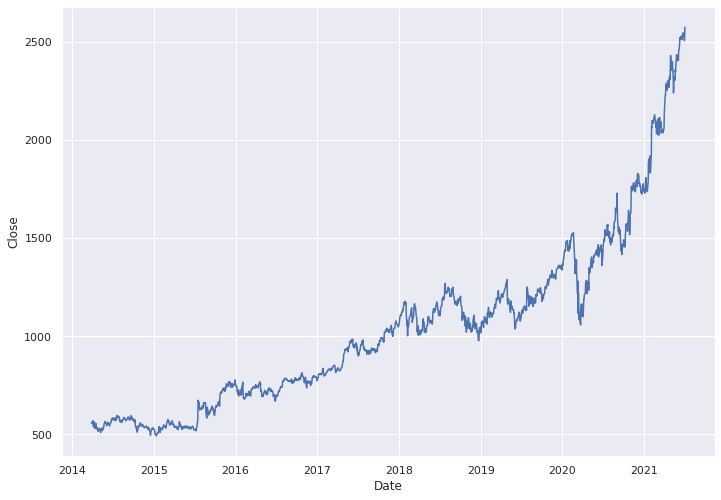

In [ ]:
sns.lineplot(data=df, x="Date", y="Close")

FB

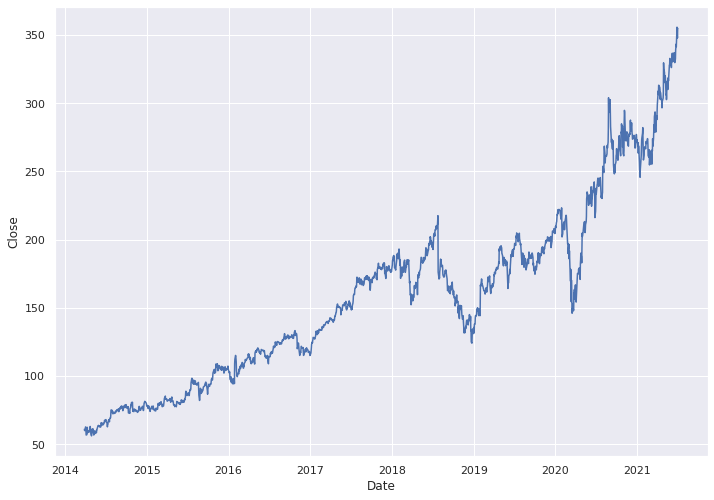

In [8]:
sns.lineplot(data=df, x="Date", y="Close")

AAPL


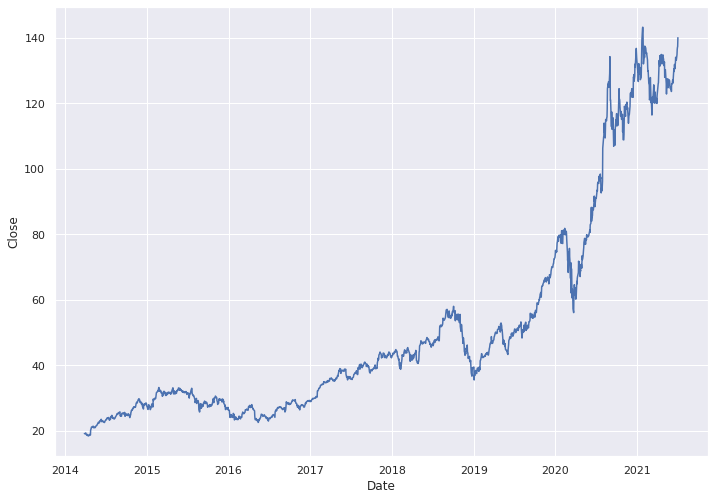

In [10]:
sns.lineplot(data=df, x="Date", y="Close")

NFLX

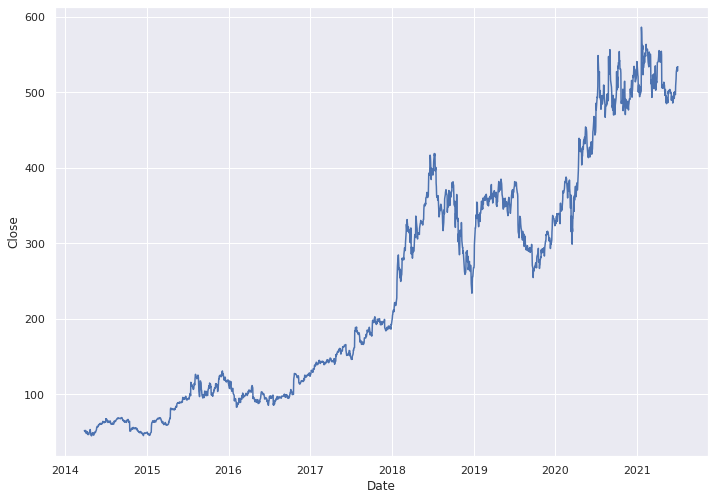

In [12]:
sns.lineplot(data=df, x="Date", y="Close")

###Candlestick plot

In [ ]:
dff = df.copy()

In [ ]:
def inc_dec(c, o):
    if c > o:
        value="Increase"
    elif c < o:
        value="Decrease"
    else:
        value="Equal"
    return value

dff["Status"]=[inc_dec(c,o) for c, o in zip(dff.Close,dff.Open)]
dff["Middle"] = (dff.Open+df.Close)/2
dff["Height"] = abs(dff.Close-dff.Open)
df

p = figure(x_axis_type='datetime', width=1000, height=300)
p.title.text = "Candlestick Chart"
hours_12 = 12*60*60*1000
p.segment(dff.index, dff.High, dff.index, dff.Low, color="blue")
#tăng
p.rect(dff.index[dff.Status=="Increase"],dff.Middle[dff.Status=="Increase"],
   hours_12, dff.Height[dff.Status=="Increase"],fill_color="#CCFFFF",
   line_color="green")
#giảm
p.rect(dff.index[dff.Status=="Decrease"],dff.Middle[dff.Status=="Decrease"],
   hours_12, dff.Height[dff.Status=="Decrease"],fill_color="#FF3333",
   line_color="red")

output_file("chart.html")
p

Figure(id='1002', ...)

### Drawing candlestick in 3 months 01-01-2018 : 01-03-2018

     |████████████████████████████████| 6.3MB 17.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.60-py2.py3-none-any.whl size=23819 sha256=72065f484c384397b6284911b5230cd41124d9c4931fe0532f9728843805a925
  Stored in directory: /root/.cache/pip/wheels/f0/be/a4/846f02c5985562250917b0ab7b33fff737c8e6e8cd5209aa3b
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#!pip install yfinance
import yfinance as yf
dataGOOG = yf.download('GOOG','2018-01-01','2018-03-01')
def inc_dec(c, o):
    if c > o:
        value="Increase"
    elif c < o:
        value="Decrease"
    else:
        value="Equal"
    return value

dataGOOG["Status"]=[inc_dec(c,o) for c, o in zip(dataGOOG.Close,dataGOOG.Open)]
dataGOOG["Middle"] = (dataGOOG.Open+dataGOOG.Close)/2
dataGOOG["Height"] = abs(dataGOOG.Close-dataGOOG.Open)
dataGOOG

p = figure(x_axis_type='datetime', width=1000, height=300)
p.title.text = "Candlestick Chart"
hours_12 = 12*60*60*1000
p.segment(dataGOOG.index, dataGOOG.High, dataGOOG.index, dataGOOG.Low, color="blue")
#tăng
p.rect(dataGOOG.index[dataGOOG.Status=="Increase"],dataGOOG.Middle[dataGOOG.Status=="Increase"],
   hours_12, dataGOOG.Height[dataGOOG.Status=="Increase"],fill_color="#CCFFFF",
   line_color="green")
#giảm
p.rect(dataGOOG.index[dataGOOG.Status=="Decrease"],dataGOOG.Middle[dataGOOG.Status=="Decrease"],
   hours_12, dataGOOG.Height[dataGOOG.Status=="Decrease"],fill_color="#FF3333",
   line_color="red")

output_file("chart.html")
p

Figure(id='1912', ...)

###Time Series Decomposition
1. Additive Decomposition
2. Multiplicative Decomposition

### Additive Decomposition

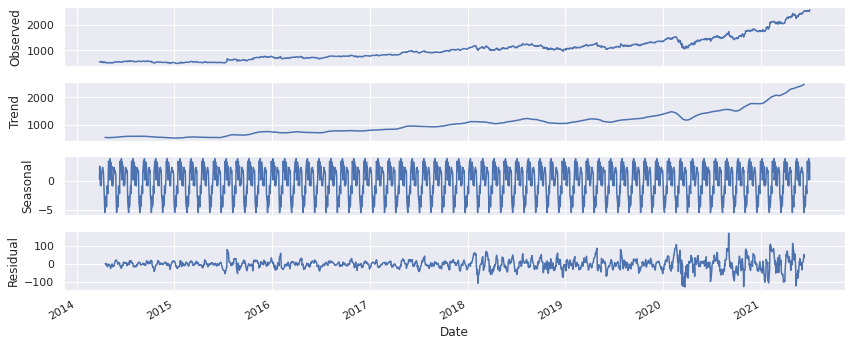

In [ ]:
decomposition = seasonal_decompose(df['Close'], 
                                   freq=30, 
                                   model='additive')

plt.rcParams['figure.figsize'] = 12, 5
decomposition.plot()
plt.show();

### in a year 2017-2018: 2018-2019

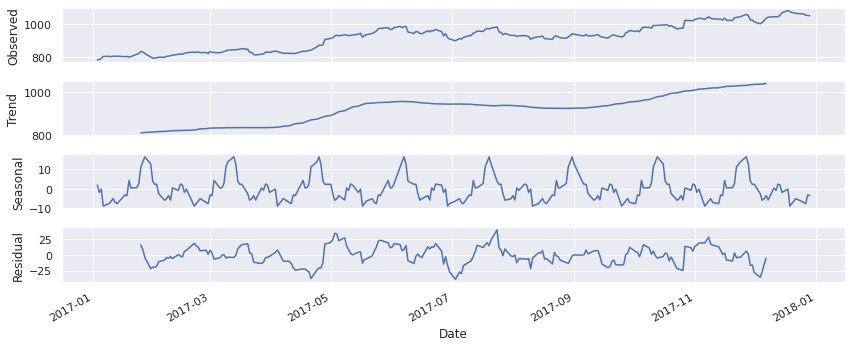

In [ ]:
import yfinance as yf
dataGOOG = yf.download('GOOG','2017-01-01','2018-01-01')
decomposition = seasonal_decompose(dataGOOG['Close'], 
                                   freq=30, 
                                   model='additive')

plt.rcParams['figure.figsize'] = 12, 5
decomposition.plot()
plt.show();

[*********************100%***********************]  1 of 1 completed


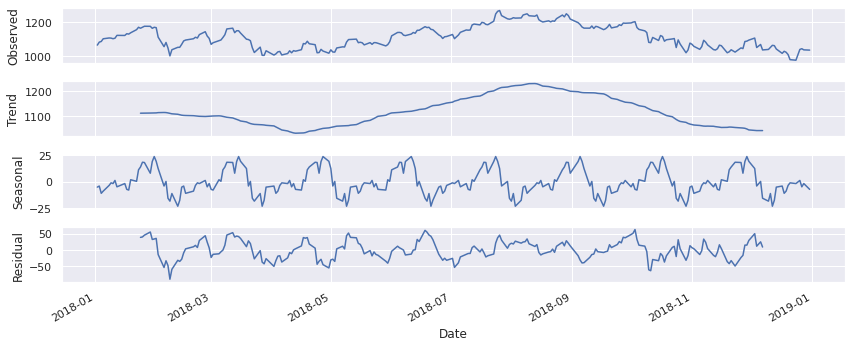

In [ ]:
import yfinance as yf
dataGOOG = yf.download('GOOG','2018-01-01','2019-01-01')
decomposition = seasonal_decompose(dataGOOG['Close'], 
                                   freq=30, 
                                   model='additive')

plt.rcParams['figure.figsize'] = 12, 5
decomposition.plot()
plt.show();

### Multiplicative Decomposition

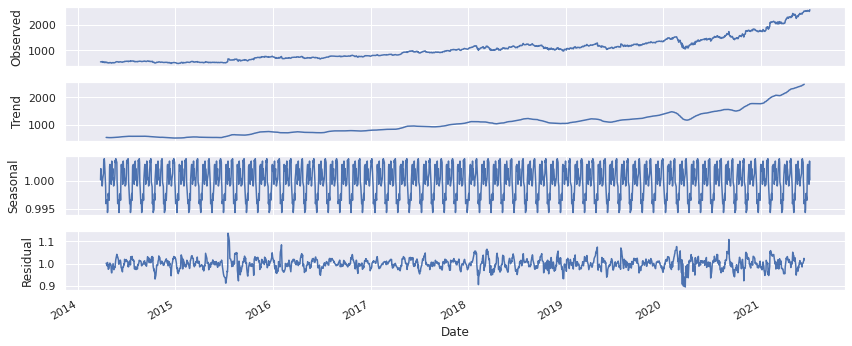

In [ ]:
decomposition = seasonal_decompose(df['Close'], 
                                   freq=30,
                                   model='multiplicative')

plt.rcParams['figure.figsize'] = 12, 5
decomposition.plot()
plt.show();

## Seasonality

In [ ]:
df_sea = df.copy()
df_sea.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,566.444824,566.444824,551.406128,556.930969,556.930969,13136
2014-03-28,559.663452,564.879150,557.140381,558.456787,558.456787,41213
2014-03-31,565.337891,565.447571,555.405151,555.445007,555.445007,10830
2014-04-01,557.180237,566.893616,557.180237,565.607117,565.607117,7922
2014-04-02,598.347229,603.174011,560.650757,565.447571,565.447571,147103


In [68]:
!pip install yfinance
import yfinance as yf
dataGOOG = yf.download('GOOG','2014-03-27','2021-07-02')
dataGOOG.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,566.444824,566.444824,551.406128,556.930969,556.930969,13136
2014-03-28,559.663452,564.879150,557.140381,558.456787,558.456787,41213
2014-03-31,565.337891,565.447571,555.405151,555.445007,555.445007,10830
2014-04-01,557.180237,566.893616,557.180237,565.607117,565.607117,7922
2014-04-02,598.347229,603.174011,560.650757,565.447571,565.447571,147103


In [69]:
dataGOOG['year'] = dataGOOG.index.year
dataGOOG['month'] = dataGOOG.index.month
dataGOOG

,Open,High,Low,Close,Adj Close,Volume,year,month
Date,,,,,,,,
2014-03-27,566.444824,566.444824,551.406128,556.930969,556.930969,13136,2014,3
2014-03-28,559.663452,564.879150,557.140381,558.456787,558.456787,41213,2014,3
2014-03-31,565.337891,565.447571,555.405151,555.445007,555.445007,10830,2014,3
2014-04-01,557.180237,566.893616,557.180237,565.607117,565.607117,7922,2014,4
2014-04-02,598.347229,603.174011,560.650757,565.447571,565.447571,147103,2014,4
...,...,...,...,...,...,...,...,...
2021-06-25,2539.139893,2550.100098,2528.879883,2539.899902,2539.899902,1674200,2021,6
2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,2536.389893,1404700,2021,6
2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,2520.370117,1047500,2021,6


In [70]:
df_pivot = pd.pivot_table(dataGOOG, values='Close', index='month', columns='year', aggfunc='mean') # sum
df_pivot

year,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,
1,NaN,511.015012,718.495792,807.904752,1130.770467,1072.264279,1436.653797,1808.383693
2,NaN,536.519088,702.689001,816.916581,1088.206839,1114.242123,1464.110519,2068.356824
3,556.944255,558.183871,727.056821,834.111307,1091.490479,1179.197620,1188.394098,2059.844785
4,538.549982,539.304467,736.833813,844.056840,1035.696187,1226.226190,1234.140480,2289.842367
5,532.591115,535.238998,712.182856,939.284085,1069.275901,1150.763178,1381.113751,2352.595496
6,556.901495,532.915913,706.486364,953.766824,1137.626668,1081.122504,1431.047718,2501.394098
7,582.416656,590.093636,725.719504,942.865009,1187.590472,1152.076804,1513.573176,2527.370117
8,572.030154,636.838097,775.793476,922.023045,1225.671732,1180.686812,1545.944749,NaN
9,580.295840,617.934756,773.619527,931.299503,1175.808934,1220.839520,1518.553804,NaN


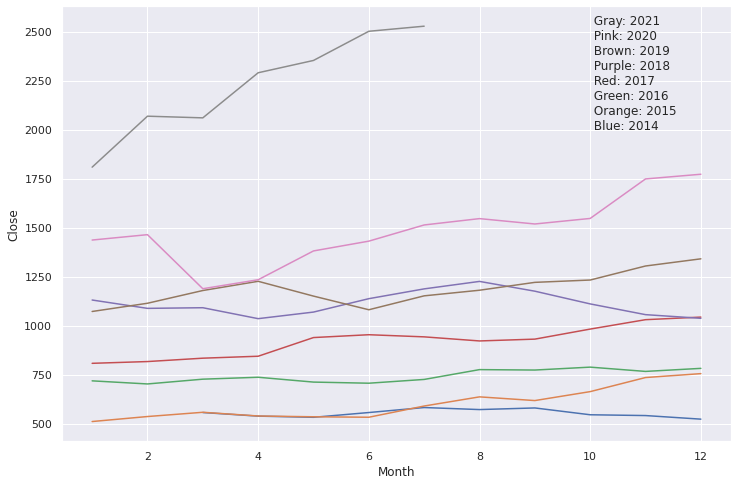

In [78]:
txt = ' Gray: 2021 \n Pink: 2020 \n Brown: 2019 \n Purple: 2018 \n Red: 2017 \n Green: 2016 \n Orange: 2015 \n Blue: 2014'
df_pivot.plot(figsize=(12,8))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Close')
plt.text(10,2000,txt)
plt.show()

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,566.444824,566.444824,551.406128,556.930969,556.930969,13136
2014-03-28,559.663452,564.879150,557.140381,558.456787,558.456787,41213
2014-03-31,565.337891,565.447571,555.405151,555.445007,555.445007,10830
2014-04-01,557.180237,566.893616,557.180237,565.607117,565.607117,7922
2014-04-02,598.347229,603.174011,560.650757,565.447571,565.447571,147103


#5. Analytis data
###i. MA20, MA50, MA100
###ii. EMA(50)

###Moving avarage
 Đường trung bình động đơn giản là một chỉ báo xu hướng kỹ thuật có thể hỗ trợ xác định xem giá tài sản sẽ tiếp tục hay nó sẽ đảo ngược xu hướng tăng hay giảm. Một đường trung bình động đơn giản có thể được nâng cao như một đường trung bình động hàm mũ (EMA) có trọng số nhiều hơn đối với hành động giá gần đây

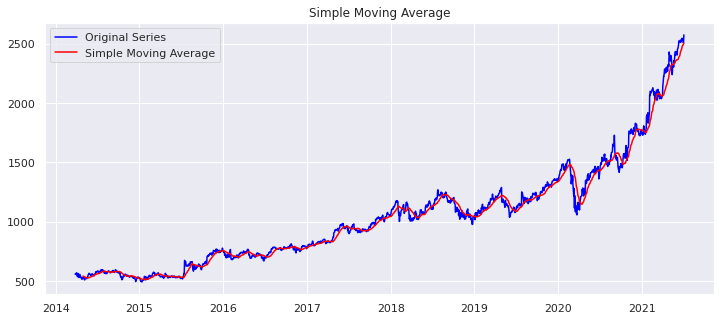

In [ ]:
# Simple Moving average (SMA)
rolmean = pd.Series(df['Close']).rolling(window=24).mean()

# Simple: average of 12 last observations. 
# 1962-12-01: avg = 12 months of 1962

# Plot Simple Moving average:
orig = plt.plot(df['Close'], color='blue',label='Original Series')
mean = plt.plot(rolmean, color='red', label='Simple Moving Average')
plt.legend(loc='best')
plt.title('Simple Moving Average')
plt.show(block=False)

In [ ]:
# Moving Average like in our slides?

def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
m = 20
indent = int(m/2)
ma_20 = pd.Series(movingaverage(df['Close'], m)[indent:(-1)*indent])
ma_20.index = df.index[indent:(-1)*indent]

m = 50
indent = int(m/2)
ma_50 = pd.Series(movingaverage(df['Close'], m)[indent:(-1)*indent])
ma_50.index = df.index[indent:(-1)*indent]

m = 100
indent = int(m/2)
ma_100 = pd.Series(movingaverage(df['Close'], m)[indent:(-1)*indent])
ma_100.index = df.index[indent:(-1)*indent]


In [ ]:
df_EMA = df.copy()
#Add the indicators to the data set
#Creating the data set 
#MACD(df)
#RSI(df)
#df_EMA['SMA'] = SMA(df)


In [ ]:
#Create the Exponential Moving Average Indicator
def EMA(data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust=False).mean()
df_EMA['EMA'] = EMA(df)
#Show the data
df_EMA


,Open,High,Low,Close,Adj Close,Volume,EMA
Date,,,,,,,
2014-03-27,566.444824,566.444824,551.406128,556.930969,556.930969,13136,556.930969
2014-03-28,559.663452,564.879150,557.140381,558.456787,558.456787,41213,557.076285
2014-03-31,565.337891,565.447571,555.405151,555.445007,555.445007,10830,556.920925
2014-04-01,557.180237,566.893616,557.180237,565.607117,565.607117,7922,557.748182
2014-04-02,598.347229,603.174011,560.650757,565.447571,565.447571,147103,558.481457
...,...,...,...,...,...,...,...
2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,2536.389893,1405500,2496.360560
2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,2520.370117,1047500,2498.647185
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300,2499.377935


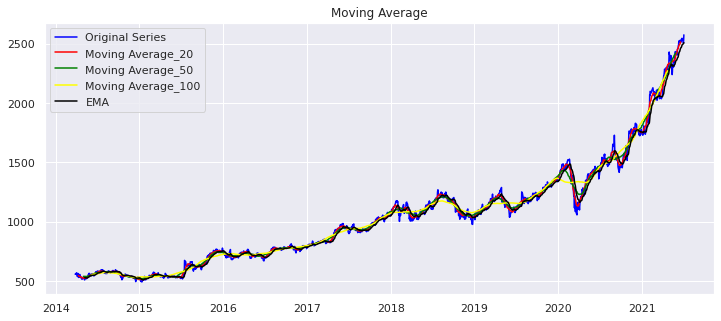

In [ ]:
# Plot Moving average:
orig = plt.plot(df['Close'], color='blue',label='Original Series')
mean_20 = plt.plot(ma_20, color='red', label='Moving Average_20')
mean_50 = plt.plot(ma_50, color='green', label='Moving Average_50')
mean_100 = plt.plot(ma_100, color='yellow', label='Moving Average_100')
mean_EMA = plt.plot(df_EMA['EMA'], color='black', label='EMA')
plt.legend(loc='best')
plt.title('Moving Average')
plt.show(block=False)

A year

In [ ]:
import yfinance as yf
dataGOOG = yf.download('GOOG','2018-01-01','2019-01-01')
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
m = 20
indent = int(m/2)
ma_20 = pd.Series(movingaverage(dataGOOG['Close'], m)[indent:(-1)*indent])
ma_20.index = dataGOOG.index[indent:(-1)*indent]

m = 50
indent = int(m/2)
ma_50 = pd.Series(movingaverage(dataGOOG['Close'], m)[indent:(-1)*indent])
ma_50.index = dataGOOG.index[indent:(-1)*indent]

m = 100
indent = int(m/2)
ma_100 = pd.Series(movingaverage(dataGOOG['Close'], m)[indent:(-1)*indent])
ma_100.index = dataGOOG.index[indent:(-1)*indent]

def EMA(data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust=False).mean()
dataGOOG['EMA'] = EMA(dataGOOG)


[*********************100%***********************]  1 of 1 completed


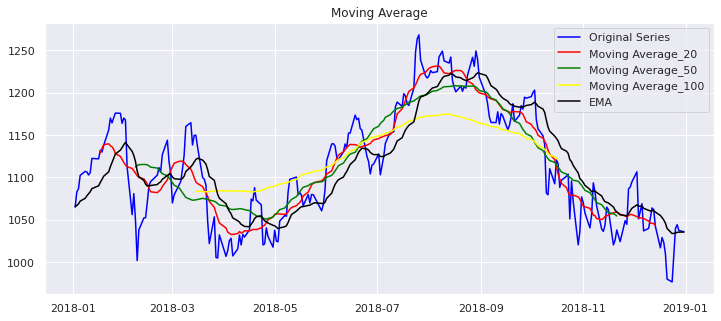

In [ ]:
# Plot Moving average:
orig = plt.plot(dataGOOG['Close'], color='blue',label='Original Series')
mean_20 = plt.plot(ma_20, color='red', label='Moving Average_20')
mean_50 = plt.plot(ma_50, color='green', label='Moving Average_50')
mean_100 = plt.plot(ma_100, color='yellow', label='Moving Average_100')
mean_EMA = plt.plot(dataGOOG['EMA'], color='black', label='EMA')
plt.legend(loc='best')
plt.title('Moving Average')
plt.show(block=False)

ONLY SMA

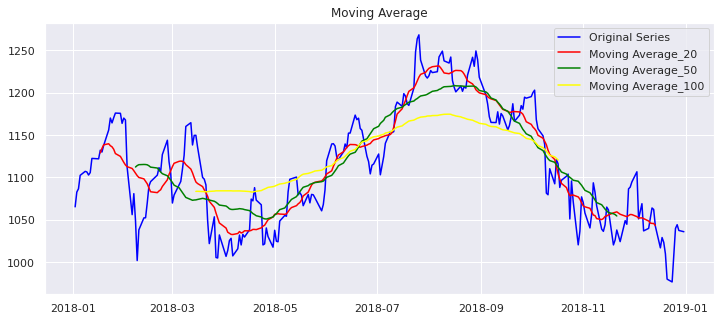

In [ ]:
orig = plt.plot(dataGOOG['Close'], color='blue',label='Original Series')
mean_20 = plt.plot(ma_20, color='red', label='Moving Average_20')
mean_50 = plt.plot(ma_50, color='green', label='Moving Average_50')
mean_100 = plt.plot(ma_100, color='yellow', label='Moving Average_100')
plt.legend(loc='best')
plt.title('Moving Average')
plt.show(block=False)

ONLY EMA

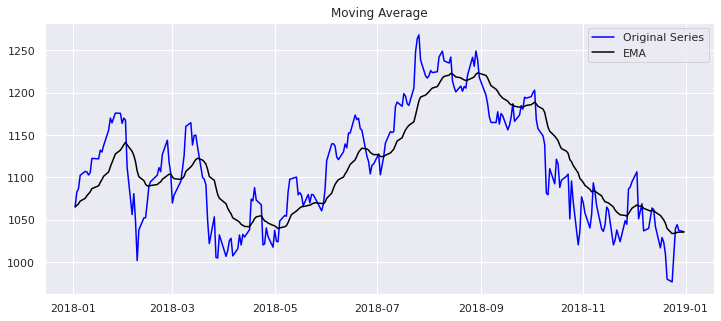

In [ ]:
# Plot Moving average:
orig = plt.plot(dataGOOG['Close'], color='blue',label='Original Series')
mean_EMA = plt.plot(dataGOOG['EMA'], color='black', label='EMA')
plt.legend(loc='best')
plt.title('Moving Average')
plt.show(block=False)

### Exponential Moving Average (EMA)
EMA là một đường trung bình động mà nơi một trọng lượng lớn hơn và tầm quan trọng trên hầu hết các điểm dữ liệu gần đây. Giống như tất cả các đường trung bình động , chỉ báo xu hướng kỹ thuật này được sử dụng để tạo ra các tín hiệu mua và bán dựa trên sự giao nhau và phân kỳ từ mức trung bình

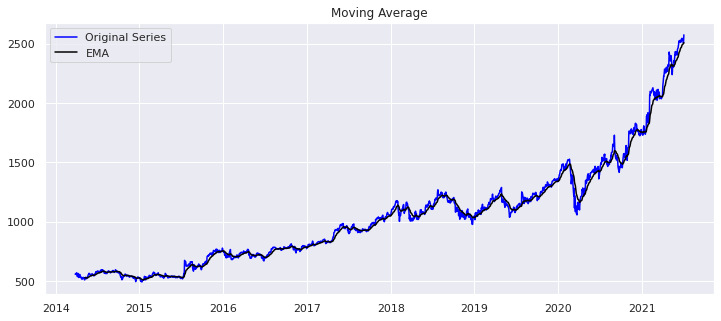

In [ ]:
orig = plt.plot(df['Close'], color='blue',label='Original Series')
mean_EMA = plt.plot(df_EMA['EMA'], color='black', label='EMA')
plt.legend(loc='best')
plt.title('Moving Average')
plt.show(block=False)


# TEST
Tạo các hàm để tính toán Đường trung bình động đơn giản (SMA) và Đường trung bình động hàm mũ (EMA).

In [ ]:
#Create functions to calculate the SMA, & the EMA
#Create the Simple Moving Average Indicator
#Typical time periods for moving averages are 15, 20,& 30
#Create the Simple Moving Average Indicator
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()
#Create the Exponential Moving Average Indicator
def EMA(data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust=False).mean()

In [ ]:
#Create a function to calculate the Moving Average Convergence/Divergence (MACD)
def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
    #Calculate the Short Term Exponential Moving Average
    ShortEMA = EMA(data, period_short, column=column) #AKA Fast moving average
    #Calculate the Long Term Exponential Moving Average
    LongEMA = EMA(data, period_long, column=column) #AKA Slow moving average
    #Calculate the Moving Average Convergence/Divergence (MACD)
    data['MACD'] = ShortEMA - LongEMA
    #Calcualte the signal line
    data['Signal_Line'] = EMA(data, period_signal, column='MACD')#data['MACD'].ewm(span=period_signal, adjust=False).mean()
    return data

In [ ]:
#Create a function to calculate the Relative Strength Index (RSI)
def RSI(data, period = 14, column = 'Close'):
  delta = data[column].diff(1) #Use diff() function to find the discrete difference over the column axis with period value equal to 1
  delta = delta.dropna() # or delta[1:]
  up =  delta.copy() #Make a copy of this object’s indices and data
  down = delta.copy() #Make a copy of this object’s indices and data
  up[up < 0] = 0 
  down[down > 0] = 0 
  data['up'] = up
  data['down'] = down
  AVG_Gain = SMA(data, period, column='up')#up.rolling(window=period).mean()
  AVG_Loss = abs(SMA(data, period, column='down'))#abs(down.rolling(window=period).mean())
  RS = AVG_Gain / AVG_Loss
  RSI = 100.0 - (100.0/ (1.0 + RS))
  data['RSI'] = RSI
  return data

Thêm các chỉ số vào tập dữ liệu và hiển thị dữ liệu.

In [ ]:
#Add the indicators to the data set
#Creating the data set 
MACD(df_EMA)
RSI(df_EMA)
df_EMA['SMA'] = SMA(df_EMA)
df_EMA['EMA'] = EMA(df_EMA)
#Show the data
df_EMA


,Open,High,Low,Close,Adj Close,Volume,EMA,MACD,Signal_Line,up,down,RSI,SMA
Date,,,,,,,,,,,,,
2014-03-27,566.444824,566.444824,551.406128,556.930969,556.930969,13136,556.930969,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-03-28,559.663452,564.879150,557.140381,558.456787,558.456787,41213,557.076285,0.121718,0.024344,1.525818,0.000000,NaN,NaN
2014-03-31,565.337891,565.447571,555.405151,555.445007,555.445007,10830,556.920925,-0.024563,0.014562,0.000000,-3.011780,NaN,NaN
2014-04-01,557.180237,566.893616,557.180237,565.607117,565.607117,7922,557.748182,0.671763,0.146002,10.162110,0.000000,NaN,NaN
2014-04-02,598.347229,603.174011,560.650757,565.447571,565.447571,147103,558.481457,1.196935,0.356189,0.000000,-0.159546,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,2536.389893,1405500,2496.360560,43.257796,46.479136,0.000000,-3.510009,66.004960,2456.735335
2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,2520.370117,1047500,2498.647185,40.022578,45.187824,0.000000,-16.019776,58.289995,2463.367342
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300,2499.377935,35.910963,43.332452,0.000000,-14.050049,45.182228,2470.130347


In [ ]:
#Create the target column
df_EMA['Target'] = np.where(df_EMA['Close'].shift(-1) > df_EMA['Close'], 1, 0) # if tomorrows price is greater than todays price put 1 else put 0
#Remove the date column
#remove_list = ['EMA','Target'] 
#df = df.drop(columns=remove_list)
#Show the data
df_EMA


,Open,High,Low,Close,Adj Close,Volume,EMA,MACD,Signal_Line,up,down,RSI,SMA,Target
Date,,,,,,,,,,,,,,
2014-03-27,566.444824,566.444824,551.406128,556.930969,556.930969,13136,556.930969,0.000000,0.000000,NaN,NaN,NaN,NaN,1
2014-03-28,559.663452,564.879150,557.140381,558.456787,558.456787,41213,557.076285,0.121718,0.024344,1.525818,0.000000,NaN,NaN,0
2014-03-31,565.337891,565.447571,555.405151,555.445007,555.445007,10830,556.920925,-0.024563,0.014562,0.000000,-3.011780,NaN,NaN,1
2014-04-01,557.180237,566.893616,557.180237,565.607117,565.607117,7922,557.748182,0.671763,0.146002,10.162110,0.000000,NaN,NaN,0
2014-04-02,598.347229,603.174011,560.650757,565.447571,565.447571,147103,558.481457,1.196935,0.356189,0.000000,-0.159546,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,2536.389893,1405500,2496.360560,43.257796,46.479136,0.000000,-3.510009,66.004960,2456.735335,0
2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,2520.370117,1047500,2498.647185,40.022578,45.187824,0.000000,-16.019776,58.289995,2463.367342,0
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300,2499.377935,35.910963,43.332452,0.000000,-14.050049,45.182228,2470.130347,1


# Draw the plots with SMA, EMA, MACD, RSI

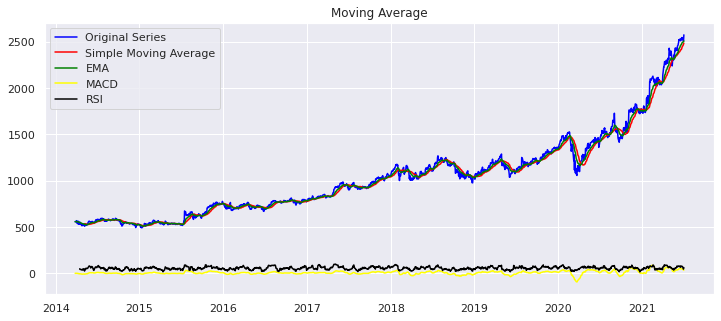

In [ ]:
# Plot Moving average:
orig = plt.plot(df_EMA['Close'], color='blue',label='Original Series')
SMA = plt.plot(df_EMA['SMA'], color='red', label='Simple Moving Average')
EMA = plt.plot(df_EMA['EMA'], color='green', label='EMA')
MACD = plt.plot(df_EMA['MACD'], color='yellow', label='MACD')
RSI = plt.plot(df_EMA['RSI'], color='black', label='RSI')
plt.legend(loc='best')
plt.title('Moving Average')
plt.show(block=False)

# PREDICTIONS

In [ ]:
#Remove the first 29 days of data
df_EMA = df_EMA[29:]
#Show the data set
df_EMA

,Open,High,Low,Close,Adj Close,Volume,EMA,MACD,Signal_Line,up,down,RSI,SMA,Target
Date,,,,,,,,,,,,,,
2014-05-08,507.067841,515.813843,505.063354,509.600891,509.600891,2021334,526.898734,-9.107210,-8.055490,1.037140,0.000000,32.564614,536.500707,1
2014-05-09,509.351563,518.476501,502.819519,517.309753,517.309753,2439479,525.985497,-8.746404,-8.193673,7.708862,0.000000,43.153824,535.180000,1
2014-05-12,522.076660,528.738342,517.588989,528.469116,528.469116,1912536,526.222033,-7.473842,-8.049707,11.159363,0.000000,46.834150,534.180411,1
2014-05-13,529.436462,534.602234,528.060181,531.630432,531.630432,1653427,526.737118,-6.139463,-7.667658,3.161316,0.000000,54.239633,533.386592,0
2014-05-14,531.540649,531.540649,523.851746,525.208069,525.208069,1191763,526.591495,-5.536369,-7.241400,0.000000,-6.422363,50.965177,532.039957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,2536.389893,1405500,2496.360560,43.257796,46.479136,0.000000,-3.510009,66.004960,2456.735335,0
2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,2520.370117,1047500,2498.647185,40.022578,45.187824,0.000000,-16.019776,58.289995,2463.367342,0
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300,2499.377935,35.910963,43.332452,0.000000,-14.050049,45.182228,2470.130347,1


In [ ]:
#Split the data set into a feature or independent data set (X) and a target or dependent data set (Y)
keep_columns = ['Close', 'MACD', 'Signal_Line', 'RSI', 'SMA', 'EMA']
X = df_EMA[keep_columns].values
Y = df_EMA['Target'].values

In [ ]:
#Split the data again but this time into 80% training and 20% testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Tạo và đào tạo mô hình.

In [ ]:
#Create and train the model 
tree = DecisionTreeClassifier().fit(X_train, Y_train)

In [ ]:
#Check how well the SVC Model on training data
print(tree.score(X_train, Y_train))


1.0


In [ ]:
#Check the SVC Model on the test data set
print(tree.score(X_test, Y_test))

0.5290858725761773


In [ ]:
#show the model tree predictions
tree_predictions = tree.predict(X_test)
print(tree_predictions)

[1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1
 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1
 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0]


In [ ]:
Y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, tree_predictions))

              precision    recall  f1-score   support

           0       0.48      0.48      0.48       165
           1       0.57      0.57      0.57       196

    accuracy                           0.53       361
   macro avg       0.53      0.53      0.53       361
weighted avg       0.53      0.53      0.53       361

